Our Graph only worked in Colab instead of VSCode for some reason


In [ ]:
import pandas as pd
import numpy as np
import math

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import bernoulli
from scipy.stats import binom

import statsmodels.api as sm
import statsmodels.formula.api as smf

import plotly.express as px

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:

# Links for the CSV files
link = 'https://drive.google.com/file/d/1pMFjKL5BOcI0pSk_tFN9xfjrdEtoy9Rz/view?usp=drive_link'
link1 = 'https://drive.google.com/file/d/1v8okqnZ2fMWVV4dMuSptqVuPSJON2qit/view?usp=drive_link'

# to get the id of the file
id = link.split("/")[-2]
id1 = link1.split("/")[-2]

downloaded = drive.CreateFile({'id':id})
downloaded1 = drive.CreateFile({'id':id1})

downloaded.GetContentFile('IVR1.csv')
downloaded1.GetContentFile('IVR2.csv')

df_ivr1 = pd.read_csv('IVR1.csv')
df_ivr2 = pd.read_csv('IVR2.csv')


In [ ]:
df = pd.concat([df_ivr1,df_ivr2])


In [ ]:
df['eservice_ind_13_march'].replace(1, 'enrolled', inplace = True)
df['eservice_ind_13_march'].replace(0, 'not enrolled', inplace = True)
df['eservice_ind_18_march'].replace(1, 'enrolled', inplace = True)
df['eservice_ind_18_march'].replace(0, 'not enrolled', inplace = True)

df['card_activation_status_13_march'].replace([0, '0', ' ', math.nan], 'Activated', inplace = True)
df['card_activation_status_13_march'].replace([7, '7'], 'New Account Number not Activated', inplace = True)
df['card_activation_status_13_march'].replace([8, '8'], 'Same Account Number not Activated', inplace = True)
df['card_activation_status_13_march'].replace([9, '9'], 'Activated Today', inplace = True)

df['card_activation_status_18_march'].replace([0, '0', ' ', math.nan], 'Activated', inplace = True)
df['card_activation_status_18_march'].replace([7, '7'], 'New Account Number not Activated', inplace = True)
df['card_activation_status_18_march'].replace([8, '8'], 'Same Account Number not Activated', inplace = True)
df['card_activation_status_18_march'].replace([9, '9'], 'Activated Today', inplace = True)

df['account_status_13_march'].replace('A', 'Authorization Prohibited (open but on hold)', inplace = True)
df['account_status_13_march'].replace('B', 'Bankrupt (closed)', inplace = True)
df['account_status_13_march'].replace('C', 'Closed', inplace = True)
df['account_status_13_march'].replace('E', 'Closed (Revoked)', inplace = True)
df['account_status_13_march'].replace('F', 'Closed (Frozen)', inplace = True)
df['account_status_13_march'].replace('I', 'Closed (Intrest Accrual Prohibited)', inplace = True)
df['account_status_13_march'].replace('Z', 'Closed (Charge off Adjustment)', inplace = True)
df['account_status_13_march'].replace('L', 'Lost (New Account # issued)', inplace = True)
df['account_status_13_march'].replace('U', 'Stolen (New Account # issued)', inplace = True)
df['account_status_13_march'].replace([' ', math.nan], 'Open (no restrictions)', inplace = True)

df['account_status_18_march'].replace('A', 'Authorization Prohibited (open but on hold)', inplace = True)
df['account_status_18_march'].replace('B', 'Bankrupt (closed)', inplace = True)
df['account_status_18_march'].replace('C', 'Closed', inplace = True)
df['account_status_18_march'].replace('E', 'Closed (Revoked)', inplace = True)
df['account_status_18_march'].replace('F', 'Closed (Frozen)', inplace = True)
df['account_status_18_march'].replace('I', 'Closed (Intrest Accrual Prohibited)', inplace = True)
df['account_status_18_march'].replace('Z', 'Closed (Charge off Adjustment)', inplace = True)
df['account_status_18_march'].replace('L', 'Lost (New Account # issued)', inplace = True)
df['account_status_18_march'].replace('U', 'Stolen (New Account # issued)', inplace = True)
df['account_status_18_march'].replace([' ', math.nan], 'Open (no restrictions)', inplace = True)

df['ebill_enrolled_status_13_march'].replace('E', 'Electronic Only', inplace = True)
df['ebill_enrolled_status_13_march'].replace(' ', 'Paper Only', inplace = True)
df['ebill_enrolled_status_13_march'].replace('D', 'Does not Participate in EBP', inplace = True)
df['ebill_enrolled_status_13_march'].replace('B', 'Hard Copy and Electronic statement', inplace = True)
df['ebill_enrolled_status_13_march'].replace('L', 'Hard Copy and Electronic statement always', inplace = True)
df['ebill_enrolled_status_13_march'].replace(math.nan, 'Paper Only', inplace = True)

df['ebill_enrolled_status_18_march'].replace('E', 'Electronic Only', inplace = True)
df['ebill_enrolled_status_18_march'].replace(' ', 'Paper Only', inplace = True)
df['ebill_enrolled_status_18_march'].replace('D', 'Does not Participate in EBP', inplace = True)
df['ebill_enrolled_status_18_march'].replace('B', 'Hard Copy and Electronic statement', inplace = True)
df['ebill_enrolled_status_18_march'].replace('L', 'Hard Copy and Electronic statement always', inplace = True)
df['ebill_enrolled_status_18_march'].replace(math.nan, 'Paper Only', inplace = True)

df['auto_pay_enrolled_status_13_march'].replace(0, 'Not Enrolled', inplace = True)
df['auto_pay_enrolled_status_13_march'].replace(1, 'Enrolled', inplace = True)

df['auto_pay_enrolled_status_18_march'].replace(0, 'Not Enrolled', inplace = True)
df['auto_pay_enrolled_status_18_march'].replace(1, 'Enrolled', inplace = True)

df = df[df['delinquency_history_13_march'].isin(['[00]', '[02]', '[03]', '[22]', '[32]', '[43]', '[23]', '[54]', '[76]', '[07]', '[08]', '[88]', '[25]', '[05]', '[56]',
                                                       '[04]', '[06]', '[33]', '[65]', '[34]', '[35]', '[48]', '[24]', '[87]', '[44]', '[66]', '[37]', '[55]', '[38]', '[47]',
                                                       '[78]', '[46]', '[58]', '[45]', '[57]', '[67]', '[26]', '[27]', '[68]', '[77]', '[36]'])]
df = df[df['delinquency_history_18_march'].isin(['[00]', '[02]', '[03]', '[22]', '[32]', '[43]', '[23]', '[54]', '[76]', '[07]', '[08]', '[88]', '[25]', '[05]', '[56]',
                                                        '[04]', '[06]', '[33]', '[65]', '[34]', '[35]', '[48]', '[24]', '[87]', '[44]', '[66]', '[37]', '[55]', '[38]', '[47]',
                                                        '[78]', '[46]', '[58]', '[45]', '[57]', '[67]', '[26]', '[27]', '[68]', '[77]', '[36]',])]
df = df[df['no_of_accounts_with_syf_13_march'] < 14.5]
df = df[df['account_balance_13_march'] < 4100]
df['account_open_year_13_march'] = df['account_open_date_13_march'].str.strip().str[-4:].astype(int)
df = df[df['account_open_year_13_march'] > 2006]
df = df.dropna()

In [ ]:
df['delinquency_history_13_march'].unique()

array(['[00]', '[03]', '[02]', '[32]', '[22]', '[43]', '[23]', '[54]',
       '[76]', '[07]', '[08]', '[88]', '[05]', '[56]', '[04]', '[06]',
       '[33]', '[25]', '[65]', '[34]', '[35]', '[48]', '[24]', '[87]',
       '[44]', '[55]', '[46]', '[26]', '[58]', '[68]', '[45]', '[47]',
       '[57]', '[36]', '[67]', '[77]', '[78]', '[27]', '[66]', '[37]'],
      dtype=object)

In [ ]:
def extract_numbers(value):
    value = value.strip('[]')  # Remove square brackets
    first_num = int(value[0])   # Extract first number
    last_num = int(value[-1])   # Extract last number
    return first_num, last_num

df[['delinquency_history_current_13_march', 'delinquency_history_previous_13_march']] = df['delinquency_history_13_march'].apply(lambda x: pd.Series(extract_numbers(x)))


In [ ]:
df['resolved'].unique()

array([1, 0])

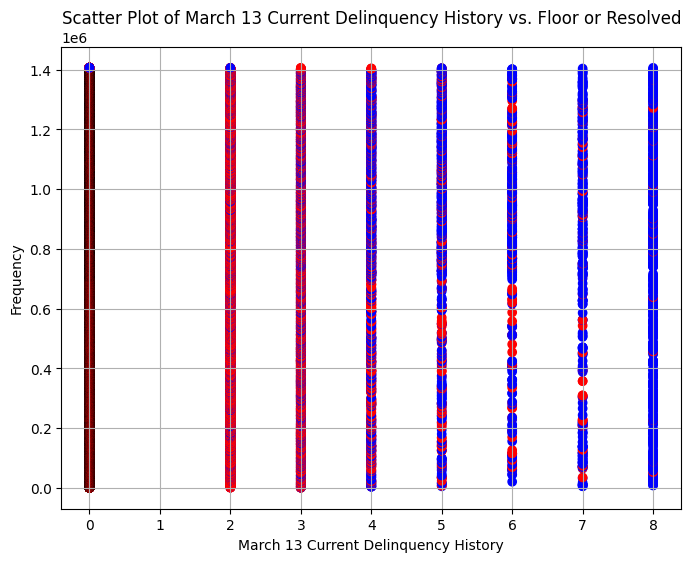

In [ ]:
plt.figure(figsize=(8, 6))
colors = {1: 'red', 0: 'blue'}  # Define colors for categories
plt.scatter(df['delinquency_history_current_13_march'], range(len(df)), c=df['resolved'].map(colors), label=df['resolved'])
plt.xlabel('March 13 Current Delinquency History')
plt.ylabel('Frequency')
plt.title('Scatter Plot of March 13 Current Delinquency History vs. Floor or Resolved')
plt.grid(True)
plt.show()

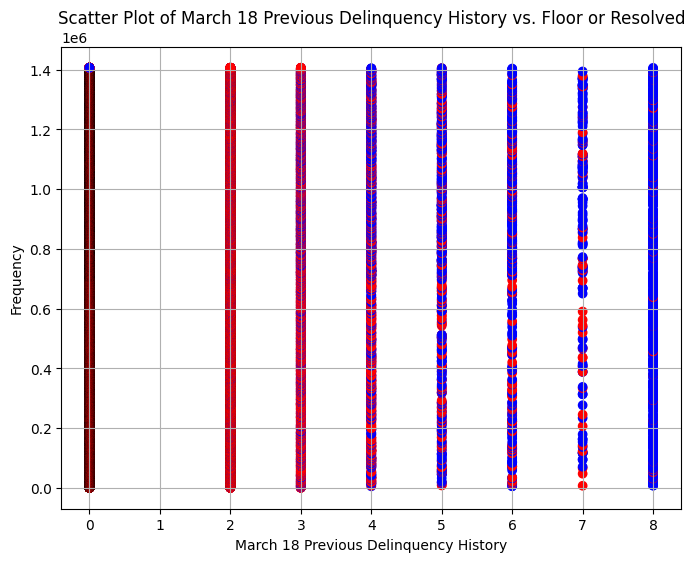

In [ ]:
plt.figure(figsize=(8, 6))
colors = {1: 'red', 0: 'blue'}  # Define colors for categories
plt.scatter(df['delinquency_history_previous_18_march'], range(len(df)), c=df['resolved'].map(colors), label=df['resolved'])
plt.xlabel('March 18 Previous Delinquency History')
plt.ylabel('Frequency')
plt.title('Scatter Plot of March 18 Previous Delinquency History vs. Floor or Resolved')
plt.grid(True)
plt.show()